# Machine Learning Housing Corporation Project

- **Goal**: Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.
- There are eight main steps: 
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

Reference: [Github](https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb)
## Keywords:
- Data pipeline: a sequence of data processing components 

## 1. Frame the problem 
- is it supervised, unsupervised, or Reinforcement Learning? Is it a classification task, a regression task, or something else? Should you use *batch learning* or *online learning* techniques? 
- Answer:
    - **Supervised learning** task since you are given labeled training examples (each instance comes with the expected output, i.e., the district’s median housing price).
    - **Multiple regression** problem since the system will use multiple features to make a prediction
    - **Univariate regression** problem since we are only trying to predict a single value for each district. If we were trying to predict multiple values per district, it would be a *multivariate* regression problem
    - **Batch learning** as no continuous flow of data coming in the system, there is no particular need to adjust to changing data rapidly

### 1.1. Select a Performance Measure
- **Root Mean Square Error (RMSE)**: Typical performance measure for regression problems. 
    - `m` is the number of instances in the dataset you are measuring the RMSE on.For example, if you are evaluating the RMSE on a validation set of 2,000 districts, then m = 2,000.
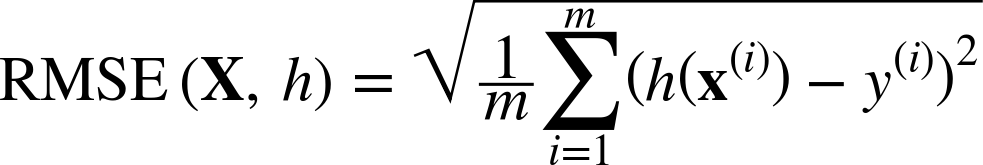

- **Mean Absolute Error** (also called the Average Absolute Deviation):

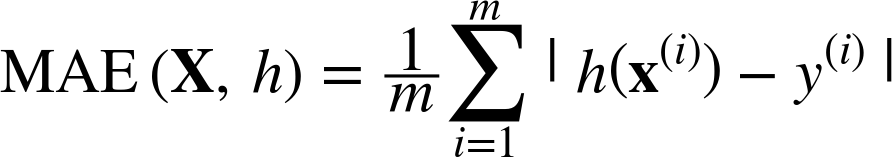

### 1.2. Check the Assumptions
Lastly, it is good practice to list and verify the assumptions that were made so far (by you or others); this can catch serious issues early on. 

## 2. Get the data
### 2.1. Read the data & inital exploration

In [1]:
#Import necessary modules
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
def load_housing_data(housing_path=""):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- 20,640 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it’s perfect to get started.
- `total_bedrooms` attribute has only 20,433 non-null values
- All attributes are numerical, except the `ocean_proximity` field. Its type is object.

Let’s look at the other fields. The `describe()` method shows a summary of the numerical attributes 
- For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).



In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

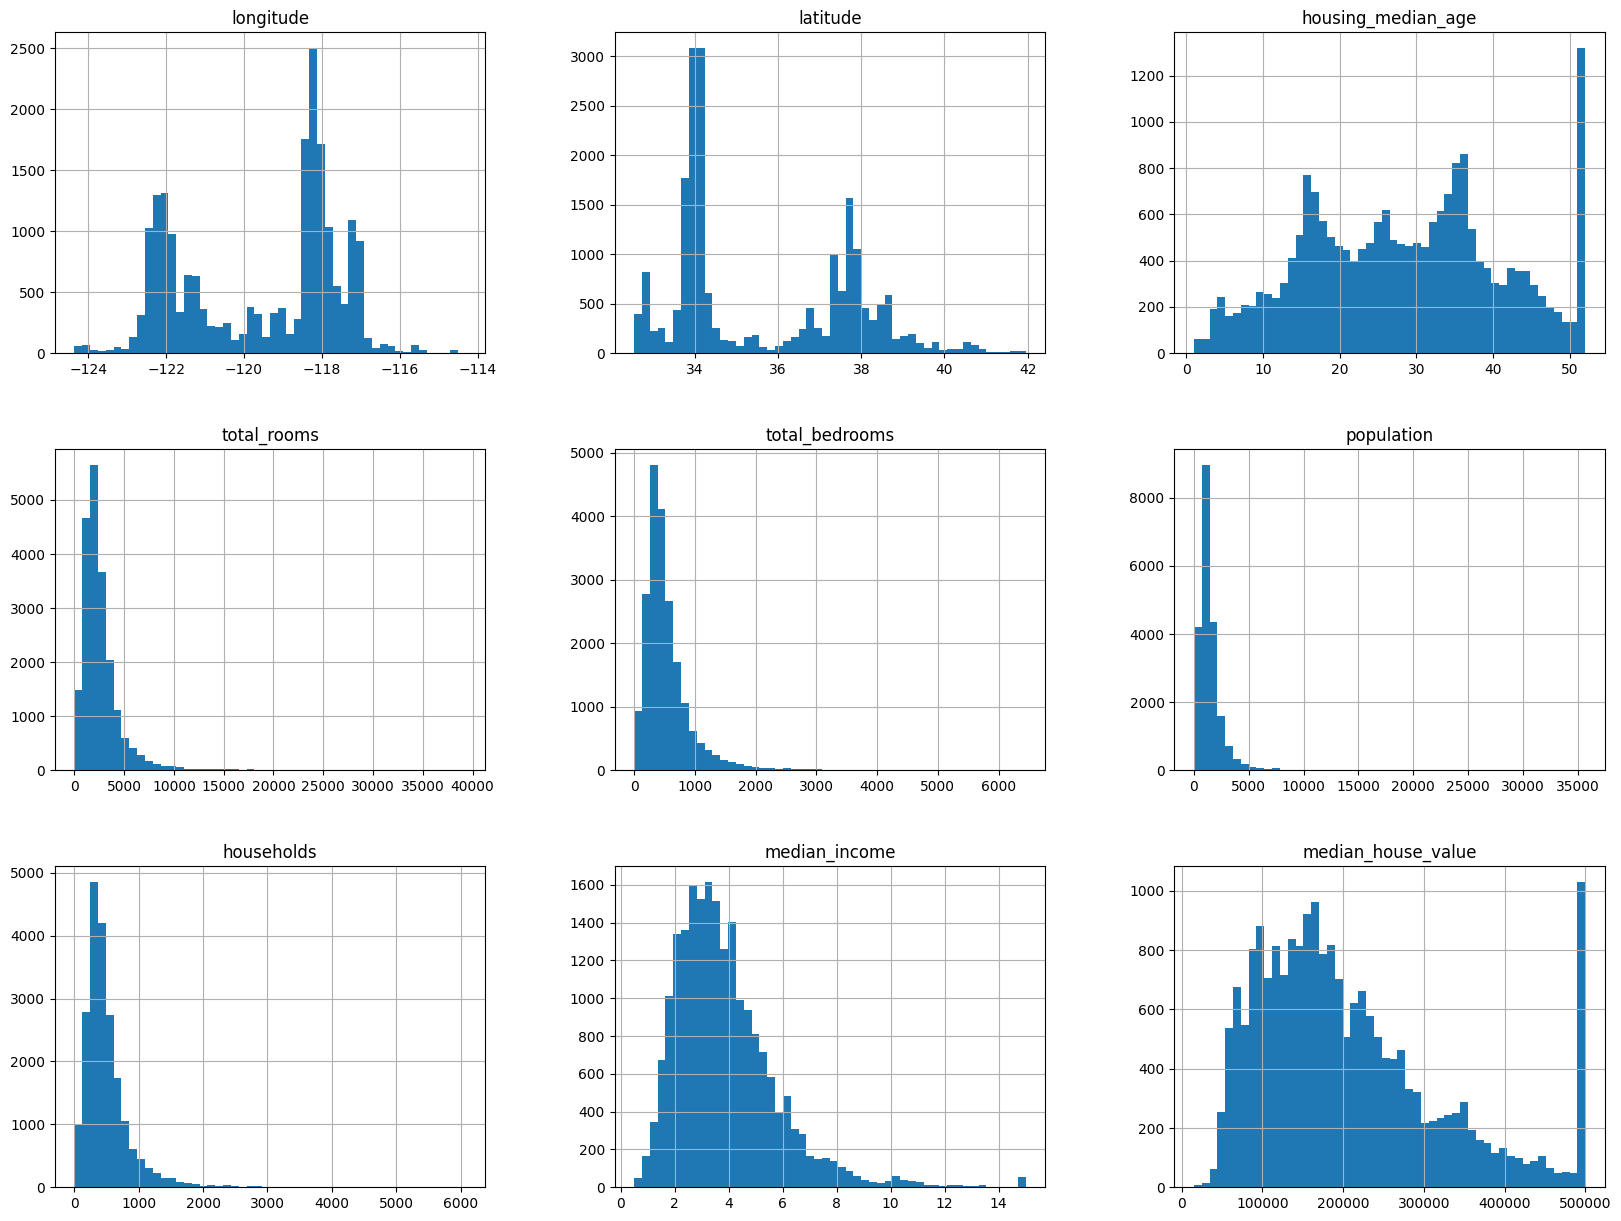

In [6]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

Notice a few things in these histograms:

1. First, the median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., `3` actually means about `$30,000`). 

2. The `housing median age` and the `median house value` were also capped. The latter may be a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond `$500,000` then you have mainly two options:
    - Collect proper labels for the districts whose labels were capped.
    - Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).

3. These attributes have very different scales. We will discuss this later in this chapter when we explore feature scaling.

4. Finally, many histograms are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

### 2.1. Create a Test Set
- Creating a test set is theoretically quite simple: just pick some instances randomly, typically 20% of the dataset, and set them aside:



In [7]:
# Break off validation set from training data
#train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

- Suppose you chatted with experts who told you that the median income is a very important attribute to predict `median housing` prices. 
- You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, you first need to create an income category attribute. 

In [8]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

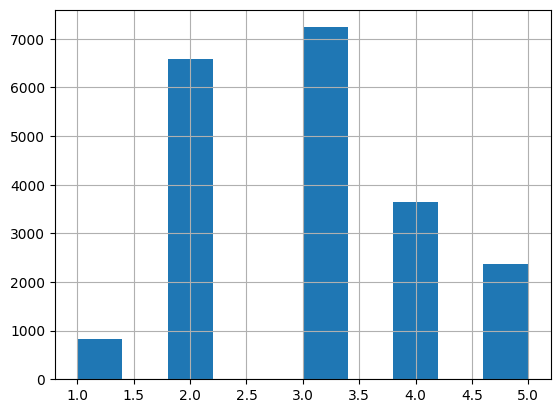

In [9]:
housing["income_cat"].hist();

- Now you are ready to do stratified sampling based on the `income_cat`. For this you can use Scikit-Learn’s `StratifiedShuffleSplit` class:

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

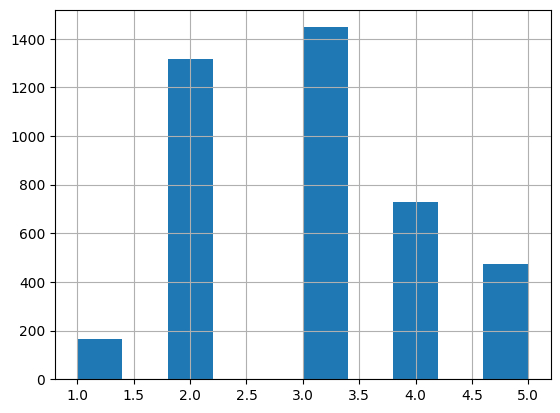

In [11]:
strat_test_set["income_cat"].hist();

As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is quite skewed.

In [12]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Now you removed the `income_cat` attribute so the data is back to its original state

We spent quite a bit of time on test set generation for a good reason: this is an often neglected but critical part of a Machine Learning project.

## 3. Explore the data to gain insights.
- First, make sure you have put the test set aside and you are only exploring the training set
    -  if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast

### 3.1. Visualizing Geographical Data
- Let’s create a copy so you can play with it without harming the training set

In [13]:
housing = strat_train_set.copy()

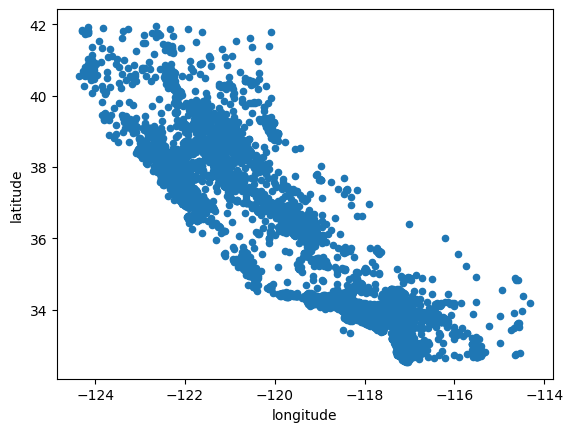

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude");

- This looks like California all right, but other than that it is hard to see any particular pattern. 
- Setting the `alpha` option to 0.4 makes it much easier to visualize the places where there is a high density of data points

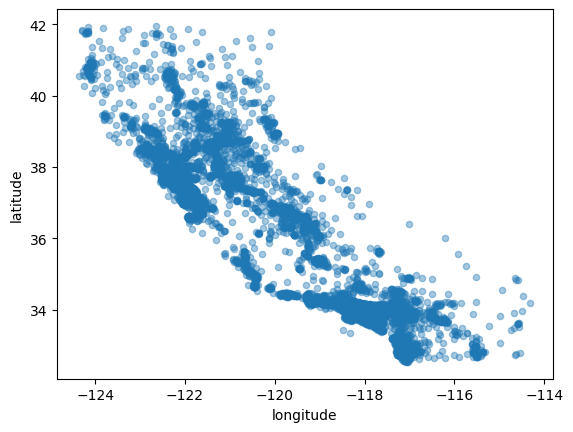

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4);

- Clearly, the high-density areas is the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

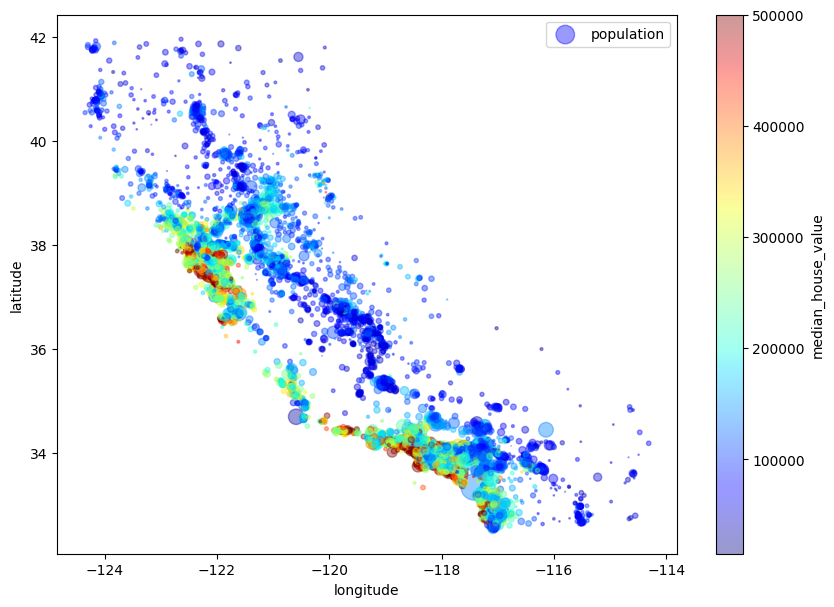

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    #To represent Population
    s=housing["population"]/100, label="population", figsize=(10,7),
    #To represent House Price
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.show()

- Housing prices are very much related 
    - to the location (e.g., close to the ocean) and 
    - to the population density, as you probably knew already. 

### 3.2. Looking for Correlations
- Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the `corr()` method

In [17]:
corr_matrix = housing.corr(numeric_only=True)

In [18]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


- Now let’s look at how much each attribute correlates with the median house value:

In [19]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

- The correlation coefficient ranges from –1 to 1. 
    - When it is close to 1, it means that there is a strong positive correlation; 
        - for example, the median house value tends to go up when the median income goes up. 
    - When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). 
    - Finally, coefficients close to zero mean that there is no linear correlation

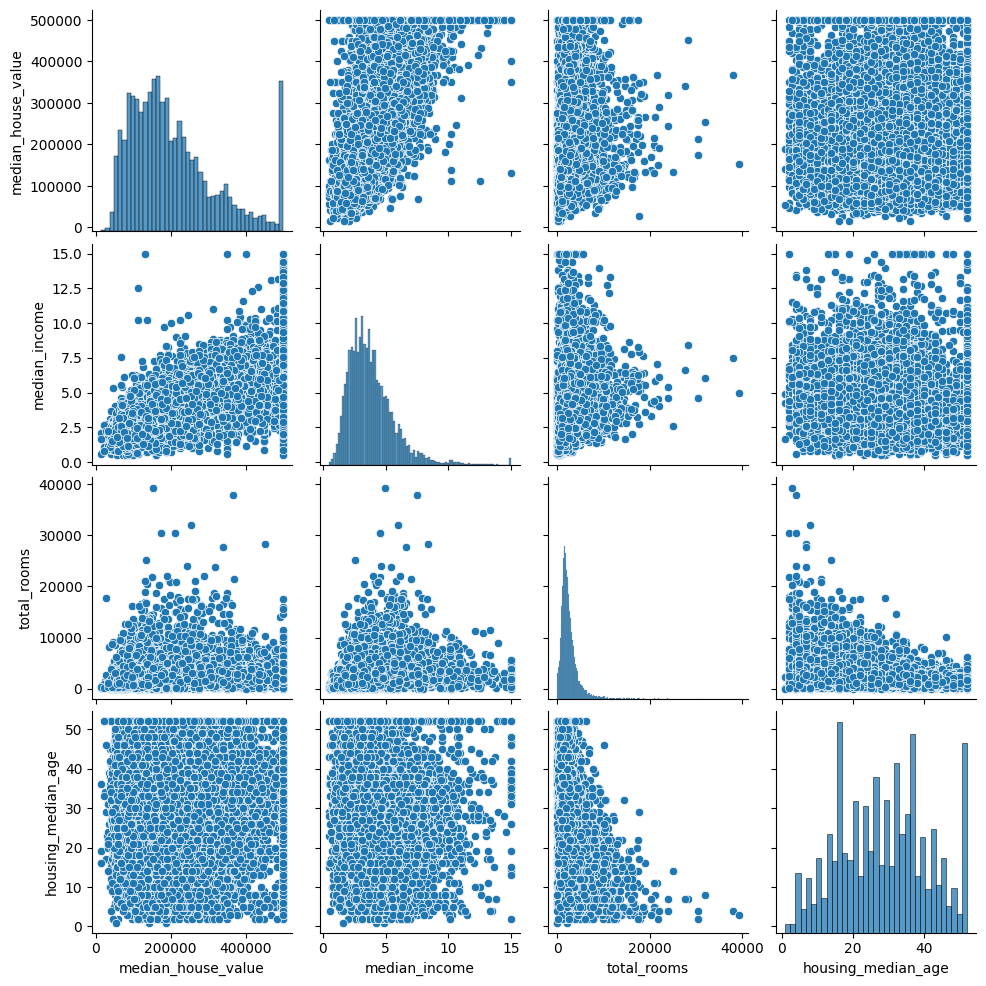

In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

sns.pairplot(housing[attributes]);

- The main diagonal (top left to bottom right) would be histogram of each attribute 
- The most promising attribute to predict the median house value is the `median income`, so let’s zoom in on their correlation scatterplot
    - Correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed. 
    - Second, the price cap that we noticed earlier is clearly visible as a horizontal line at `$500,000`. 
    - But this plot reveals other less obvious straight lines: a horizontal line around `$450,000`, another around `$350,000`, perhaps one around `$280,000`, and a few more below that. You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

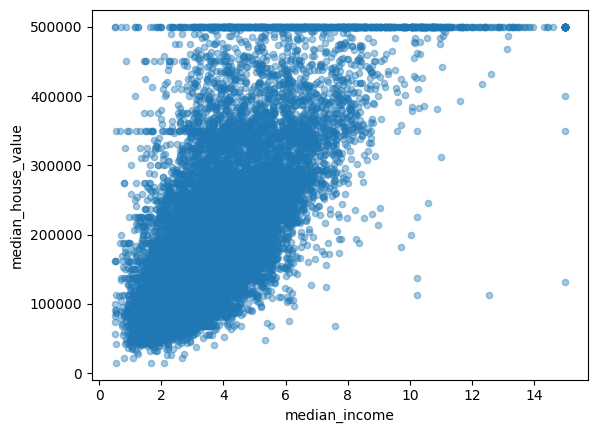

In [21]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.4);

### 3.3. Experimenting with Attribute Combinations

- One last thing you may want to do before actually preparing the data for Machine Learning algorithms is to try out various attribute combinations. 
    - For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. 
    - What you really want is the number of rooms per household. 
    - Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. Let’s create these new attributes:

In [22]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

- And now let’s look at the correlation matrix again:

In [23]:
corr_matrix = housing.corr(numeric_only=True)

In [24]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

- The new `bedrooms_per_room` attribute is much more correlated with the median house value than the total number of rooms or bedrooms. 
    - Apparently houses with a lower bedroom/room ratio tend to be more expensive. 
    - The number of rooms per household is also more informative than the total number of rooms in a district—obviously the larger the houses, the more expensive they are.

#### Conclusion: 
- This round of exploration does not have to be absolutely thorough; 
- The point is to start off on the right foot and quickly gain insights that will help you get a first reasonably good prototype. 
- But this is an iterative process: once you get a prototype up and running, you can analyze its output to gain more insights and come back to this exploration step.

# 4. Prepare the Data for Machine Learning Algorithms

- Let’s revert to a clean training set (by copying `strat_train_set` once again), 
- Let’s separate the predictors and the labels since we don’t necessarily want to apply the same transformations to the predictors and the target values (note that `drop()` creates a copy of the data and does not affect `strat_train_set`):


In [25]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## 4.1. Data Cleaning

### 4.1.1. Handling Missing Values

- Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them. 
- You noticed earlier that the `total_bedrooms` attribute has some missing values, so let’s fix this. You have three options:
    - Get rid of the corresponding districts.

    - Get rid of the whole attribute.

    - Set the values to some value (zero, the mean, the median, etc.).

- Scikit-Learn provides a handy class to take care of missing values: `SimpleImputer`.

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

#Since the median can only be computed on numerical attributes, 
#we need to create a copy of the data without the text attribute ocean_proximity

housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

- The `imputer` has simply computed the **median of each attribute** and stored the result in its `statistics_` instance variable. 
- Only the `total_bedrooms` attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [27]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [28]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [29]:
#Now you can use this “trained” imputer to transform the training set 
#by replacing missing values by the learned medians:
X = imputer.transform(housing_num)

The result is a plain NumPy array containing the transformed features. If you want to put it back into a Pandas DataFrame, it’s simple:

In [30]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### 4.1.2. Handling Text and Categorical Attributes

- Earlier we left out the categorical attribute `ocean_proximity` because it is a text attribute so we cannot compute its median

In [31]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
Name: count, dtype: int64

- Most Machine Learning algorithms prefer to work with numbers anyway, so let’s convert these categories from text to numbers. 
- For this, we can use Scikit-Learn’s `OneHotEncoder` class
- If this happens, you will want to produce denser representations called embeddings, but this requires a good understanding of neural networks (see Chapter 14 for more details).

In [32]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

- the output is a `SciPy sparse matrix`, instead of a NumPy array. 
- This is because, One-Hot Encoding will return sparse matrix, which is a matrix in which most of the elements are zero. Handling a sparse matrix as a dense one is frequently inefficient, making excessive use of memory.
- So, When working with sparse matrices it is recommended to use dedicated data structures `SciPy sparse matrix` to store only the non-zero values and their positions is a common technique in storing sparse data sets.for efficient storage and processing.
- to convert it to a (dense) NumPy array, just call the `toarray()` method:

In [33]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [34]:
cat_encoder.categories_ #get the list of categories

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 4.1.3. Custom Transformers
- Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes
- Since Scikit-Learn relies on **duck typing** (not inheritance), all you need is to create a class and implement three methods: `fit()` (returning self if nothing), `transform()`, and `fit_transform()` (simply adding `TransformerMixin` as a base class).

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin #You can get fit_transform() for free by simply adding TransformerMixin as a base class.
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

 - `np.c_`: column stack, i.e: stack more columns into X np array
 - the transformer has one hyperparameter, `add_bedrooms_per_room`, set to True by default (it is often helpful to provide sensible defaults).
     - This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not.

- The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).

## 4.2. Feature Scaling
- Two common ways to get all attributes to have the same scale:
    - `Min-max scaling`: values are shifted and rescaled so that they end up ranging from 0 to 1
    - `Standardization`: Unlike min-max scaling, standardization does **not bound values to a specific range**, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. 

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [37]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

- So far, we have handled the categorical columns and the numerical columns separately. 
- It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. 
- In version 0.20, Scikit-Learn introduced the `ColumnTransformer` for this purpose, and the good news is that it works great with Pandas DataFrames. Let’s use it to apply all the transformations to the housing data

In [1]:
from sklearn.compose import ColumnTransformer

#get the list of numerical column names and the list of categorical column names
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared


NameError: name 'housing_num' is not defined

- Note that the `OneHotEncoder` returns a **sparse** matrix, while the `num_pipeline` returns a **dense** matrix. 
- When there is such a mix of sparse and dense matrices, the `ColumnTransformer` estimates the density of the final matrix (i.e., the ratio of non-zero cells), and it returns a sparse matrix if the density is lower than a given threshold (by default, `sparse_threshold=0.3`). 
- In this example, it returns a dense matrix.

# 5. Select and Train a Model
## 5.1. Training and Evaluating on the Training Set

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [40]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [41]:
from sklearn.metrics import mean_squared_error


housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

- This is not a great score: most districts’ `median_housing_values` range between `$120,000` and `$265,000`, so a typical prediction error of `$68,628` is not very satisfying. - This is an example of a model **underfitting** the training data.
- When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough.

- **Solution**: main ways to fix *underfitting* are 
    - to select a more powerful model, 
    - to feed the training algorithm with better features, or 
    - to reduce the constraints on the model.
    
- Let’s train a `DecisionTreeRegressor` (Chapter 6). This is a powerful model, capable of finding complex **nonlinear** relationships in the data

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=1)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=1)

In [43]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

- No error at all? it is much more likely that the model has badly **overfit** the data. 
- How can you be sure? As we saw earlier, you don’t want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training, and part for model validation.

## 5.2. Evaluation Using Cross-Validation

In [44]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

- All scorer objects, including `cross_val_score`, follow the convention that **higher return values are better than lower return values**. 
- So the scoring function is actually the opposite of the MSE (i.e., a negative value)
- That is why the preceding code computes `-scores` before calculating the square root.

In [45]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [46]:
display_scores(tree_rmse_scores)

Scores: [72906.01674014 69704.51832453 67779.31584558 70252.09585268
 70889.68653631 77059.24984378 71395.40076784 74130.96455543
 68168.82132714 70399.55700719]
Mean: 71268.56268006153
Standard deviation: 2656.7676507278147


- `cross-validation` allows you to get not only an estimate of the performance of your model, but also a measure of how precise this estimate is (i.e., its **standard deviation**). We would not have this information if you just used one validation set.
- The Decision Tree has a score of approximately 71,407, generally ±2,439. 

- Let’s compute the same scores for the Linear Regression model

In [47]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,                           
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180666


- Linear Regression model perform better than Decision Tree. 
- That makes sense as Decision Tree model is overfitting so badly with the training data where `tree_rmse=0`

Let’s try one last model now: the `RandomForestRegressor` (Chapter 7)
- Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. 
- Building a model on top of many other models is called `Ensemble Learning`

In [48]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=1)


forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,                           
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [50745.2341314  48915.71387703 46890.08688287 51738.88191641
 47424.36551397 52360.46355398 52009.71370327 49763.82862469
 48647.19173843 53836.34009559]
Mean: 50233.18200376419
Standard deviation: 2161.7258049572742


- This is much better: Random Forests look very promising.
- We should try out many other models from various categories of Machine Learning algorithms (several Support Vector Machines with different kernels, possibly a neural network, etc.), without spending too much time tweaking the hyperparameters. 
- The goal is to shortlist a few (two to five) promising models.

## 5.3. Fine-Tune Your Model

Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them.

### 5.3.1. Grid Search

- One way to do that would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter
- Scikit-Learn’s `GridSearchCV` to search which hyperparameters you want it to experiment with, and what values to try out 
- It will evaluate all the possible combinations of hyperparameter values, using cross-validation

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    #first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    #all 2 × 3 = 6 combinations of hyperparameter values in the second dict
    #this time with the bootstrap hyperparameter set to False instead of True (which is the default)
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

#All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor hyperparameter values
#Train each model five times (since we are using five-fold cross validation)
#All in all, there will be 18 × 5 = 90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
#get the best combination of parameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Since 8 and 30 are the maximum values that were evaluated, you should probably try searching again with higher values, since the score may continue to improve.

In [51]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

If `GridSearchCV` is initialized with `refit=True` (which is the default), then once it finds the best estimator using cross-validation, it retrains it on the whole training set. This is usually a good idea since feeding it more data will likely improve its performance.

In [52]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    

63288.36813848923 {'max_features': 2, 'n_estimators': 3}
55667.66261352791 {'max_features': 2, 'n_estimators': 10}
52802.44931746846 {'max_features': 2, 'n_estimators': 30}
61512.90366660682 {'max_features': 4, 'n_estimators': 3}
53262.4476497377 {'max_features': 4, 'n_estimators': 10}
50454.576429434455 {'max_features': 4, 'n_estimators': 30}
59121.05882945341 {'max_features': 6, 'n_estimators': 3}
52226.019282259775 {'max_features': 6, 'n_estimators': 10}
50187.22452638016 {'max_features': 6, 'n_estimators': 30}
58746.72085950728 {'max_features': 8, 'n_estimators': 3}
52325.35511475768 {'max_features': 8, 'n_estimators': 10}
50160.78503798496 {'max_features': 8, 'n_estimators': 30}
62443.732872946915 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54190.47887014753 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60269.02202164775 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52678.67433192068 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

- In this example, we obtain the best solution by setting the `max_features` hyperparameter to 8, and the `n_estimators` hyperparameter to 30
- RMSE score for this combination is 50036, which is slightly better than the score you got earlier using the default hyperparameter values 50259.96


### 5.3.2. Randomized Search
- When the hyperparameter search space is large, it is often preferable to use `RandomizedSearchCV` instead. 
- Instead of trying out all possible combinations like `GridSearchCV`, it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration. 

In [53]:
from sklearn.model_selection import RandomizedSearchCV

# Setup random seed
np.random.seed(42)

param_grid = [
    #first evaluate all 3 × 4 = 12 combinations of n_estimators and max_features hyperparameter values specified in the first dict
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    #all 2 × 3 = 6 combinations of hyperparameter values in the second dict
    #this time with the bootstrap hyperparameter set to False instead of True (which is the default)
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

# Setup random hyperparameter search for RandomForestClassifier
randomized_search = RandomizedSearchCV(forest_reg, 
                           param_distributions=param_grid,
                           cv=5,
                           n_iter=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                                      verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
randomized_search.fit(housing_prepared, housing_labels)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=True)

In [54]:
#get the best combination of parameters
randomized_search.best_params_

{'n_estimators': 30, 'max_features': 8}

In [55]:
cvres = randomized_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64956.86473917538 {'n_estimators': 3, 'max_features': 2}
55374.75789581437 {'n_estimators': 10, 'max_features': 2}
50170.954401354415 {'n_estimators': 30, 'max_features': 6}
50899.603624370044 {'n_estimators': 30, 'max_features': 4}
60715.740244822904 {'n_estimators': 3, 'max_features': 4}
53873.14278561203 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
58839.09240901907 {'n_estimators': 3, 'max_features': 4, 'bootstrap': False}
52697.00678480169 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
49935.36780419682 {'n_estimators': 30, 'max_features': 8}
53053.54298364642 {'n_estimators': 30, 'max_features': 2}


## 5.4. Analyze the Best Models and Their Errors

- You will gain good insights on the problem by inspecting the best models. 
    - For example, the `RandomForestRegressor` can indicate the relative importance of each attribute for making accurate predictions

In [56]:
feature_importances = randomized_search.best_estimator_.feature_importances_

In [57]:
feature_importances

array([7.01392249e-02, 5.97250203e-02, 4.34881202e-02, 1.59557689e-02,
       1.51151173e-02, 1.58520869e-02, 1.41723023e-02, 3.68032671e-01,
       5.28828128e-02, 1.08738705e-01, 5.14049289e-02, 7.02997736e-03,
       1.72662988e-01, 9.45895234e-05, 1.74649605e-03, 2.95919009e-03])

In [58]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [59]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.36803267074350676), 'median_income'),
 (np.float64(0.17266298843307795), 'INLAND'),
 (np.float64(0.10873870541919058), 'pop_per_hhold'),
 (np.float64(0.07013922486268673), 'longitude'),
 (np.float64(0.05972502027999696), 'latitude'),
 (np.float64(0.05288281283662157), 'rooms_per_hhold'),
 (np.float64(0.05140492889290594), 'bedrooms_per_room'),
 (np.float64(0.043488120156905424), 'housing_median_age'),
 (np.float64(0.015955768854827086), 'total_rooms'),
 (np.float64(0.01585208691108733), 'population'),
 (np.float64(0.01511511730786214), 'total_bedrooms'),
 (np.float64(0.014172302272443444), 'households'),
 (np.float64(0.00702997736202997), '<1H OCEAN'),
 (np.float64(0.002959190090807653), 'NEAR OCEAN'),
 (np.float64(0.0017464960526465503), 'NEAR BAY'),
 (np.float64(9.458952340401043e-05), 'ISLAND')]

- With this information, you may want to try dropping some of the less useful features (e.g., apparently only one `ocean_proximity ( 'INLAND')` category is really useful, so you could try dropping the others `('<1H OCEAN','ISLAND','NEAR BAY', 'NEAR OCEAN')`).

## 5.5. Evaluate Your System on the Test Set

- After tweaking your models for a while, you eventually have a system that performs sufficiently well. 
- Now is the time to evaluate the final model on the test set.
- get the predictors and the labels from your test set, run your full_pipeline to transform the data (call transform(), not fit_transform(), you do not want to fit the test set!), and evaluate the final model on the test set:

In [60]:
final_model = randomized_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)   # => evaluates to 48006
final_rmse

np.float64(47755.655642960955)